<a href="https://colab.research.google.com/github/Diechi09/AI-Machine-Learning-Foundations/blob/main/Assignment1_DiegoO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = "/content/drive/My Drive/MLClass/titanic3.xls"
df = pd.read_excel(file_path)
df.head(3)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# After the dataframe has been imported into our notebook, we can start to dive into it and analyze its information

### TASK 1


In [3]:
#Start with some simple pandas commands that give you some surface level information about the dataframe that you have

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


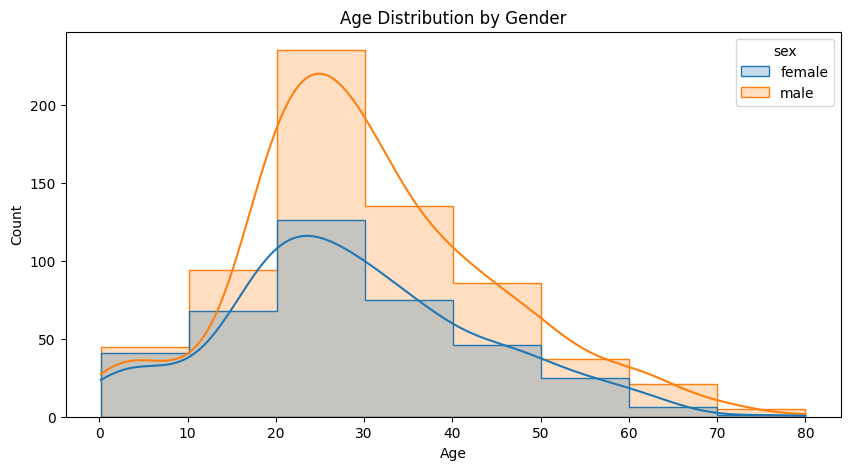

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="age", hue="sex", bins=8, kde=True, element="step", common_norm=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

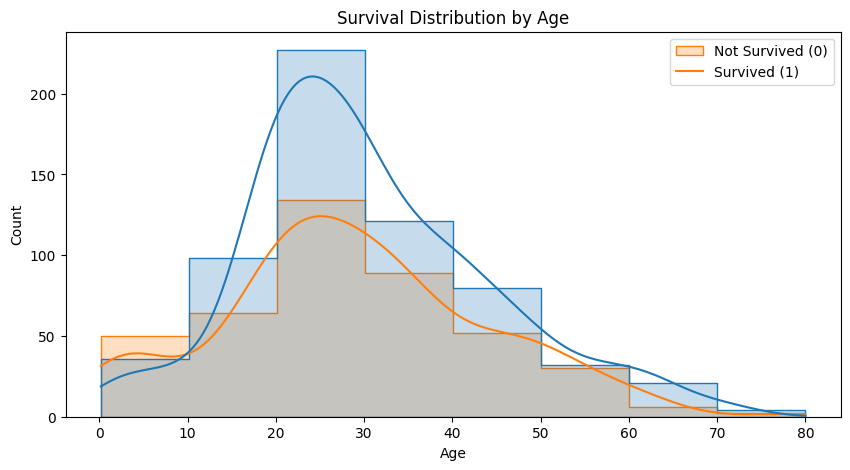

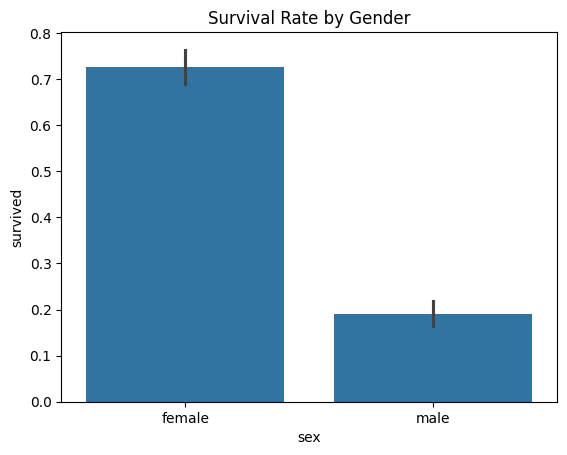

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="age", hue="survived", bins=8, kde=True, element="step", common_norm=False)
plt.title("Survival Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Not Survived (0)", "Survived (1)"])
plt.show()

sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

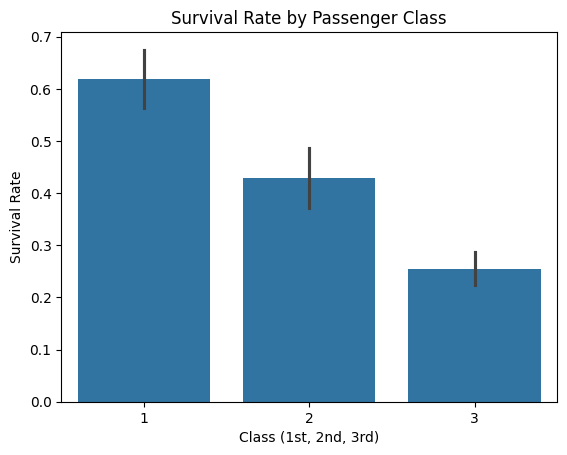

In [6]:
sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class (1st, 2nd, 3rd)")
plt.ylabel("Survival Rate")
plt.show()

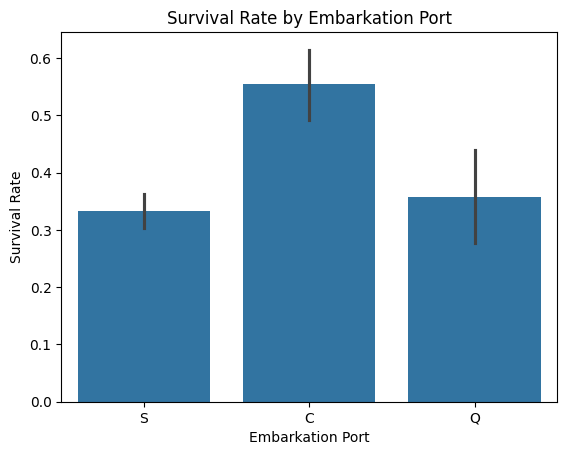

In [7]:
sns.barplot(x="embarked", y="survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

In [8]:
avg_fare = df.fare.mean()
print(f"Average ticket fare: ${avg_fare:.2f}")

total_deaths = df[df["survived"] == 0].shape[0]
bodies_found = df["body"].notna().sum()
recovery_rate = (bodies_found / total_deaths) * 100
print(f"Percentage ofdead bodies found: {recovery_rate:.2f}%")


Average ticket fare: $33.30
Percentage ofdead bodies found: 14.96%


In [9]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Most common port

df['cabin'].fillna('Unknown', inplace=True)
df['home.dest'].fillna('Unknown', inplace=True)

df['boat'].fillna('None', inplace=True)
df['body'].fillna(-1, inplace=True)

print("Missing Values after Imputation:\n", df.isnull().sum())



Missing Values after Imputation:
 pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


<ipython-input-10-0117e3dba4ca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-10-0117e3dba4ca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = ohe.fit_transform(df[['sex', 'embarked']])

new_cols = ohe.get_feature_names_out(['sex', 'embarked'])

encoded_df = pd.DataFrame(encoded_data, columns=new_cols)

df = pd.concat([df.drop(['sex', 'embarked'], axis=1), encoded_df], axis=1)


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
features_to_scale = [col for col in numerical_cols if col != 'survived']

# Standardization
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[features_to_scale] = scaler_std.fit_transform(df_standardized[features_to_scale])

# Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = scaler_minmax.fit_transform(df_normalized[features_to_scale])

print("Standardized Data (first 5 rows):")
print(df_standardized.head())

print("\nNormalized Data (first 5 rows):")
print(df_normalized.head())


Standardized Data (first 5 rows):
     pclass  survived                                             name  \
0 -1.546098         1                    Allen, Miss. Elisabeth Walton   
1 -1.546098         1                   Allison, Master. Hudson Trevor   
2 -1.546098         0                     Allison, Miss. Helen Loraine   
3 -1.546098         0             Allison, Mr. Hudson Joshua Creighton   
4 -1.546098         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

        age     sibsp     parch  ticket      fare    cabin  boat      body  \
0 -0.068420 -0.479087 -0.445000   24160  3.442480       B5     2 -0.269883   
1 -2.249092  0.481288  1.866526  113781  2.286476  C22 C26    11 -0.269883   
2 -2.164974  0.481288  1.866526  113781  2.286476  C22 C26  None -0.269883   
3  0.009230  0.481288  1.866526  113781  2.286476  C22 C26  None  2.184056   
4 -0.379021  0.481288  1.866526  113781  2.286476  C22 C26  None -0.269883   

                         home.dest  sex_male  embark

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_others, y_train, y_others = train_test_split(
    X,y,test_size=0.30,random_state=42,stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_others,y_others,test_size=0.50,random_state=42,stratify=y_others
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

print("\nDistribution in training set:\n", y_train.value_counts(normalize=True))
print("Distribution in validation set:\n", y_val.value_counts(normalize=True))
print("Distribution in test set:\n", y_test.value_counts(normalize=True))


Training set: (916, 14) (916,)
Validation set: (196, 14) (196,)
Test set: (197, 14) (197,)

Distribution in training set:
 survived
0    0.617904
1    0.382096
Name: proportion, dtype: float64
Distribution in validation set:
 survived
0    0.617347
1    0.382653
Name: proportion, dtype: float64
Distribution in test set:
 survived
0    0.619289
1    0.380711
Name: proportion, dtype: float64
